In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


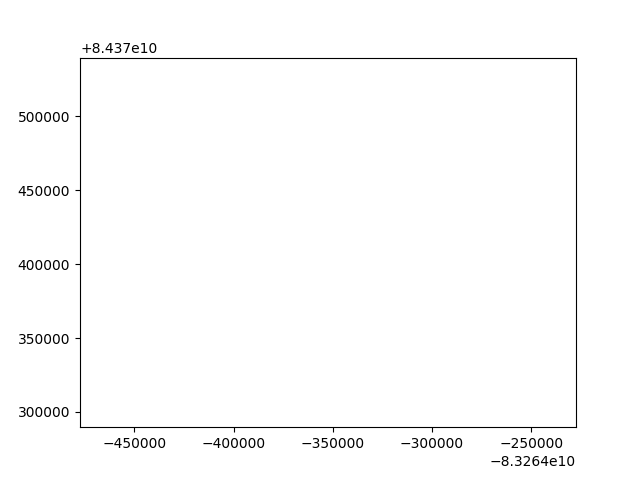

In [8]:
import matplotlib.pyplot as plt


def zoom_factory(ax,base_scale = 2.):
    def zoom_fun(event):
        # get the current x and y limits
        cur_xlim = ax.get_xlim()
        cur_ylim = ax.get_ylim()
        cur_xrange = (cur_xlim[1] - cur_xlim[0])*.5
        cur_yrange = (cur_ylim[1] - cur_ylim[0])*.5
        xdata = event.xdata # get event x location
        ydata = event.ydata # get event y location
        if event.button == 'up':
            # deal with zoom in
            scale_factor = 1/base_scale
        elif event.button == 'down':
            # deal with zoom out
            scale_factor = base_scale
        else:
            # deal with something that should never happen
            scale_factor = 1
            print(event.button)
        # set new limits
        ax.set_xlim([xdata - cur_xrange*scale_factor,
                     xdata + cur_xrange*scale_factor])
        ax.set_ylim([ydata - cur_yrange*scale_factor,
                     ydata + cur_yrange*scale_factor])
        plt.draw() # force re-draw

    fig = ax.get_figure() # get the figure of interest
    # attach the call back
    fig.canvas.mpl_connect('scroll_event',zoom_fun)

    #return the function
    return zoom_fun

fig, ax = plt.subplots()
ax.plot(range(10))
scale = 1.5
f = zoom_factory(ax,base_scale = scale)